In [2]:
import numpy as np

def rosen(x):
    """The Rosenbrock function"""
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

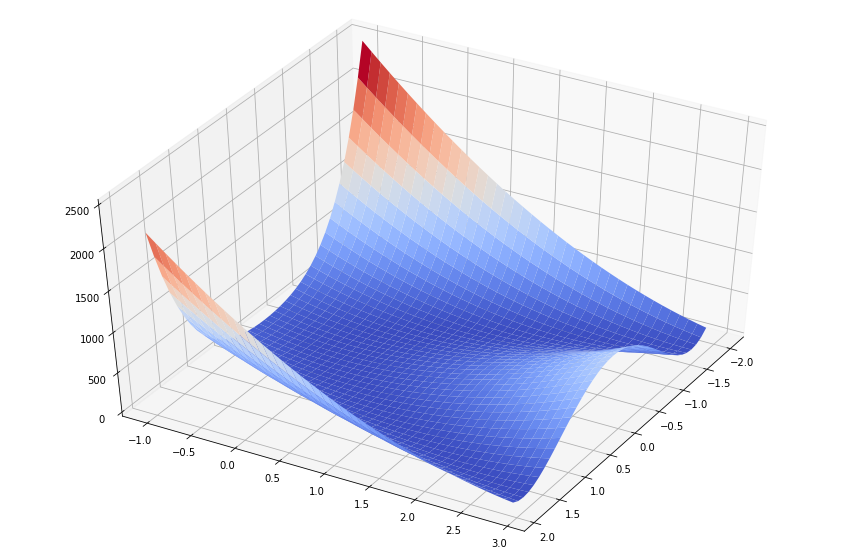

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [17]:
from scipy.optimize import minimize
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


In [7]:
def rosen_der (x):
    xm = x [1: -1]
    xm_m1 = x [: - 2]
    xm_p1 = x [2:]
    der = np.zeros_like (x)
    der [1: -1] = 200 * (xm-xm_m1 ** 2) - 400 * (xm_p1 - xm ** 2) * xm - 2 * (1-xm)
    der [0] = -400 * x [0] * (x [1] -x [0] ** 2) - 2 * (1-x [0])
    der [-1] = 200 * (x [-1] -x [-2] ** 2)
    return der

In [8]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
[1.00000004 1.0000001  1.00000021 1.00000044 1.00000092]


In [9]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

res = minimize(rosen, x0, method='Newton-CG', 
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24
[1.         1.         1.         0.99999999 0.99999999]
